# Notebook to show evolution of submesoscale eddies for the 0.1 Pa case 
Make plan view plots of surface salinity, normalized relative vorticity, the frontogenesis function, and depth integrated numerical, physical, and total mixing. Work in progress.

In [1]:
#Packages
import numpy as np
import xgcm
from xgcm import Grid
import xarray as xr
import xroms
from datetime import datetime

import glob
from xhistogram.xarray import histogram
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.ticker as tick
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.ticker import AutoMinorLocator
from datetime import timedelta


In [2]:
path1 = '/d2/home/dylan/idealized_nummix/shelf_mpdata_uwind_zerop1_dt_30_60d_avg.nc'
path2 = '/d1/shared/shelfstrat_wind/43N_open/shelf_dx_500_uwind_0_f_43N/shelf_dx_500_uwind_0_f_43N_open_avg.nc'
#0.1 Pa case
ds = xroms.open_netcdf(path1)
ds, grid = xroms.roms_dataset(ds)
# ds = ds.isel(ocean_time=slice(96,-1))
# ds['ocean_time'] = ds.ocean_time[:]+timedelta(days=4)
#Unforced case
# ds1 = xroms.open_netcdf(path2)
# ds1, grid1 = xroms.roms_dataset(ds1)
# ds1 = ds1.isel(ocean_time=slice(96,-1))

print(ds.ocean_time[0].values)
# print(ds1.ocean_time[0].values)

/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


0001-01-01 00:30:00


In [3]:
ds

/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:         (tracer: 5, s_rho: 30, s_w: 31, Nuser: 25, eta_rho: 194, xi_rho: 194, xi_u: 193, eta_v: 193, ocean_time: 1200)
Coordinates: (12/29)
  * s_rho           (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w             (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
    x_rho           (eta_rho, xi_rho) float64 dask.array<chunksize=(194, 194), meta=np.ndarray>
    y_rho           (eta_rho, xi_rho) float64 dask.array<chunksize=(194, 194), meta=np.ndarray>
    x_u             (eta_rho, xi_u) float64 dask.array<chunksize=(194, 193), meta=np.ndarray>
    y_u             (eta_rho, xi_u) float64 dask.array<chunksize=(194, 193), meta=np.ndarray>
    ...              ...
    z_rho_v0        (s_rho, eta_v, xi_rho) float64 dask.array<chunksize=(30, 193, 194), meta=np.ndarray>
    z_rho_psi0      (s_rho, eta_v, xi_u) float64 dask.array<chunksize=(30, 193, 193), meta=np.ndarray>
    z_w0            (s_w, eta_rho, xi_rho) float64 dask.array<chunksize=(31, 194, 194), meta=np.ndarray>
    z_w_u0          (s_w, eta_rho, xi_u) float64 dask.array<chunksize=(31, 194, 193), meta=np.ndarray>
    z_w_v0          (s_w, eta_v, xi_rho) float64 dask.array<chunksize=(31, 193, 194), meta=np.ndarray>
    z_w_psi0        (s_w, eta_v, xi_u) float64 dask.array<chunksize=(31, 193, 193), meta=np.ndarray>
Dimensions without coordinates: tracer, Nuser
Data variables: (12/146)
    ntimes          int32 ...
    ndtfast         int32 ...
    dt              float64 ...
    dtfast          float64 ...
    dstart          object ...
    nHIS            int32 ...
    ...              ...
    dV_u            (ocean_time, s_rho, eta_rho, xi_u) float64 dask.array<chunksize=(1, 30, 194, 193), meta=np.ndarray>
    dV_w_u          (ocean_time, s_w, eta_rho, xi_u) float64 dask.array<chunksize=(1, 1, 194, 193), meta=np.ndarray>
    dV_v            (ocean_time, s_rho, eta_v, xi_rho) float64 dask.array<chunksize=(1, 30, 193, 194), meta=np.ndarray>
    dV_w_v          (ocean_time, s_w, eta_v, xi_rho) float64 dask.array<chunksize=(1, 1, 193, 194), meta=np.ndarray>
    dV_psi          (ocean_time, s_rho, eta_v, xi_u) float64 dask.array<chunksize=(1, 30, 193, 193), meta=np.ndarray>
    dV_w_psi        (ocean_time, s_w, eta_v, xi_u) float64 dask.array<chunksize=(1, 1, 193, 193), meta=np.ndarray>
Attributes: (12/28)
    file:              shelf_dx_500_mpdata_uwind_zerop1_dt_30_60d/shelf_mpdat...
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS nonlinear model averages file
    title:             SHELFSTRAT
    var_info:          /scratch/user/dylan.schlichting/COAWST/ROMS/External/v...
    ...                ...
    compiler_command:  /sw/eb/sw/impi/2019.9.304-iccifort-2020.4.304/intel64/...
    compiler_flags:    -fp-model precise -ip -O3 -traceback
    tiling:            016x004
    history:           ROMS/TOMS, Version 3.9, Thursday - September 21, 2023 ...
    ana_file:          /scratch/user/dylan.schlichting/COAWST/Projects/shelfs...
    CPP_options:       SHELFSTRAT, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX, ANA_FS...

In [4]:
print(ds.ocean_time[180].values)
# print(ds1.ocean_time[180].values)

0001-01-08 12:30:00


In [5]:
def to_rho(var):
    if var.dims[-1] != 'xi_rho':
        var = grid.interp(var, 'X', to='center', boundary='extend')
    if var.dims[-2] != 'eta_rho':
        var = grid.interp(var, 'Y', to='center', boundary='extend')
    return var

def norm_fgf(ds,grid):
    qs = ds.salt # tracer 'q' (here salt) at the surface

    dqdx = to_rho(grid.derivative(qs, 'X')) # defined at rho-points
    dqdy = to_rho(grid.derivative(qs, 'Y'))

    us = ds.u # surface velocity field
    vs = ds.v

    dudx = grid.derivative(us, 'X', boundary='extend')
    dvdy = grid.derivative(vs, 'Y', boundary='extend')
    dudy = to_rho(grid.derivative(us, 'Y', boundary='extend'))
    dvdx = to_rho(grid.derivative(vs, 'X', boundary='extend'))

    Dgradq_i = - dudx*dqdx - dvdx*dqdy
    Dgradq_j = - dudy*dqdx - dvdy*dqdy

    # The frontogenesis function
    Ddelq2 = (dqdx*Dgradq_i + dqdy*Dgradq_j)
    Ddelq2.name = 'Frontogenesis function'

    # Density gradients squared
    gradq2 = dqdx**2 + dqdy**2
    gradq2.name = r'$(\nabla q)^2$'

    # Normalized frontogenesis function
    nDGQ2 = Ddelq2 / (gradq2 * ds.f)
    nDGQ2.name = r'Normalized Frontogenesis Function'
    return nDGQ2
nDGQ2 = norm_fgf(ds,grid)
# nDGQ2_1 = norm_fgf(ds1,grid1)

In [6]:
def velgrad(ds,grid):
    us = ds.u # surface velocity field
    vs = ds.v

    dudx = grid.derivative(us, 'X', boundary='extend')
    dvdy = grid.derivative(vs, 'Y', boundary='extend')
    dudy = to_rho(grid.derivative(us, 'Y', boundary='extend'))
    dvdx = to_rho(grid.derivative(vs, 'X', boundary='extend'))
    # Vorticity:  v_x - u_y
    zeta = (dvdx - dudy)/ds.f
    # zeta.coords['lon_rho'] = ds.coords['lon_rho']
    # zeta.coords['lat_rho'] = ds.coords['lat_rho']
    zeta.name = 'Normalized vorticity'

    # Divergence: u_x + v_y
    delta = (dudx + dvdy)/ds.f
    # delta.coords['lon_rho'] = ds.coords['lon_rho']
    # delta.coords['lat_rho'] = ds.coords['lat_rho']
    delta.name = 'Normalized divergence'

    # Major axis of deformation
    alpha = ( np.sqrt( (dudx-dvdy)**2 + (dvdx+dudy)**2 ) )/ds.f
    # alpha.coords['lon_rho'] = ds.coords['lon_rho']
    # alpha.coords['lat_rho'] = ds.coords['lat_rho']
    alpha.name = 'Normalized strain'

    # Principle deformation components
    lminor = 0.5 * (delta - alpha)
    # lminor.coords['lon_rho'] = ds.coords['lon_rho']
    # lminor.coords['lat_rho'] = ds.coords['lat_rho']
    lminor.name = 'lambda minor'

    lmajor = 0.5 * (delta + alpha)
    # lmajor.coords['lon_rho'] = ds.coords['lon_rho']
    # lmajor.coords['lat_rho'] = ds.coords['lat_rho']
    lmajor.name = 'lambda major'
    
    return zeta,delta,alpha,lminor,lmajor

zeta,delta,alpha,lminor,lmajor = velgrad(ds,grid)
# zeta1,delta1,alpha1,lminor1,lmajor1= velgrad(ds1,grid1)

In [7]:
def surface_saltgradmag(ds, grid):
    '''
Calculates the surface horizontal salinity gradient magnitude normalized by 
the Coriolis frequency. 
----
Inputs:
ds - Xarray Dataset
grid - XGCM grid object 
----
Outputs:
sgradmag: horizontal salinity gradient magnitude on the psi points

    '''
    s = ds.salt.isel(s_rho=-1)

    dsdx = grid.derivative(s, 'X', boundary = 'extend')
    dsdx_psi = xroms.to_rho(dsdx, grid)
    dsdy = grid.derivative(s, 'Y', boundary = 'extend')
    dsdy_psi = xroms.to_rho(dsdy, grid)
    
    sgradmag = (dsdx_psi**2+dsdy_psi**2)**(1/2)
    
    return sgradmag

sgradmag = surface_saltgradmag(ds, grid)
# sgradmag1 = surface_saltgradmag(ds1, grid1)

In [8]:
print(ds.ocean_time[180].values)
print(ds.ocean_time[240].values)
print(ds.ocean_time[300].values)
print(ds.ocean_time[360].values)

0001-01-08 12:30:00
0001-01-11 00:30:00
0001-01-13 12:30:00
0001-01-16 00:30:00


/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Text(2, 87, '(p)')

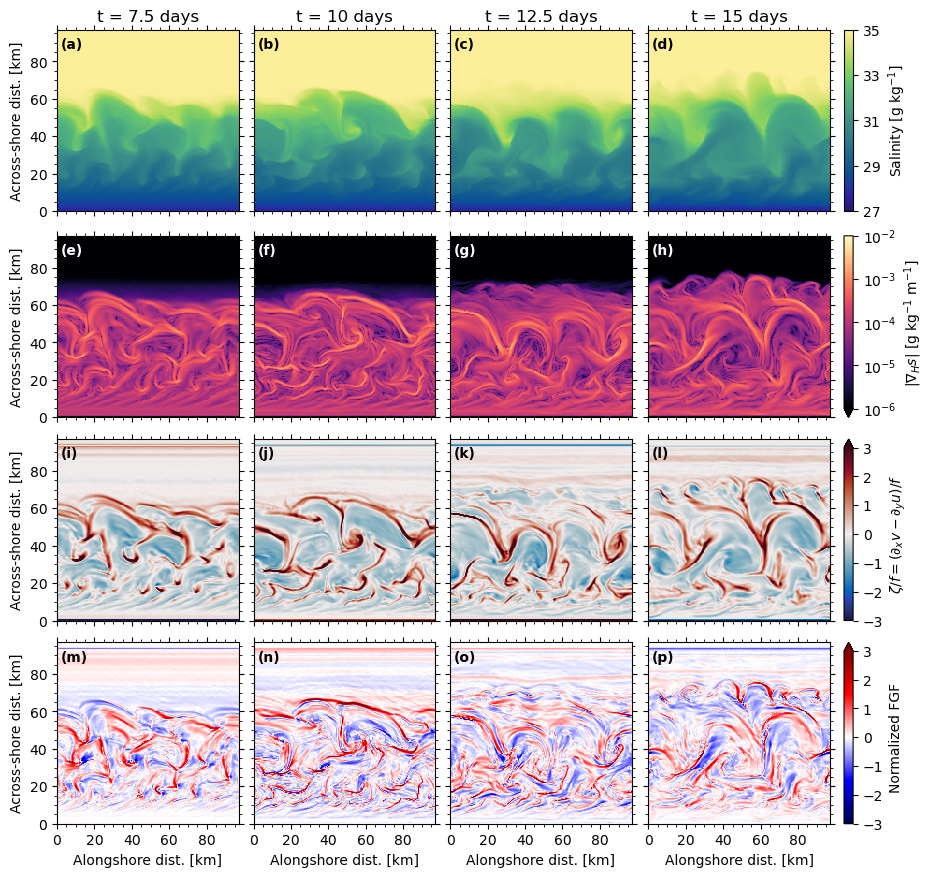

In [9]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(4,4, figsize = ((7/2)*2.63,8.66), constrained_layout = True)

#salt
xrho = (ds.x_rho/1000).values
yrho = (ds.y_rho/1000).values

mappable1 = ax[0,0].pcolormesh(xrho, yrho, ds.salt[180,-1].values, cmap = cmo.haline, vmin = 27, vmax = 35)
mappable2 = ax[0,1].pcolormesh(xrho, yrho, ds.salt[240,-1].values, cmap = cmo.haline, vmin = 27, vmax = 35)
mappable3 = ax[0,2].pcolormesh(xrho, yrho, ds.salt[300,-1].values, cmap = cmo.haline, vmin = 27, vmax = 35)
mappable4 = ax[0,3].pcolormesh(xrho, yrho, ds.salt[360,-1].values, cmap = cmo.haline, vmin = 27, vmax = 35)

cbar = fig.colorbar(mappable4, ax = ax[0,3], label = '', ticks = [27, 29, 31, 33, 35],)
cbar.ax.set_ylabel(r'Salinity [g kg$^{-1}$]')

sfill = sgradmag[180].where(sgradmag[180]>1e-6)
sfill0 = sfill.fillna(value=1e-6)
sfill1 = sgradmag[240].where(sgradmag[240]>1e-6)
sfill01 = sfill1.fillna(value=1e-6)
sfill2 = sgradmag[300].where(sgradmag[300]>1e-6)
sfill02 = sfill2.fillna(value=1e-6)
sfill3 = sgradmag[360].where(sgradmag[360]>1e-6)
sfill03 = sfill3.fillna(value=1e-6)

mappable5 = ax[1,0].pcolormesh(xrho, yrho, np.log10(sfill0), cmap = plt.get_cmap('magma'), vmin = -6, vmax = -2)
mappable6 = ax[1,1].pcolormesh(xrho, yrho, np.log10(sfill01), cmap = plt.get_cmap('magma'), vmin = -6, vmax = -2)
mappable7 = ax[1,2].pcolormesh(xrho, yrho, np.log10(sfill02), cmap = plt.get_cmap('magma'), vmin = -6, vmax = -2)
mappable8 = ax[1,3].pcolormesh(xrho, yrho, np.log10(sfill03), cmap = plt.get_cmap('magma'), vmin = -6, vmax = -2)
cbar = fig.colorbar(mappable8, ax = ax[1,3], label = '', extend = 'min', format=tick.FormatStrFormatter('$10^{%.0f}$'))
cbar.ax.set_ylabel(r'$|\nabla_H s|$ [g kg$^{-1}$ m$^{-1}$]')

mappable9 = ax[2,0].pcolormesh(xrho, yrho, zeta[180,-1], cmap = plt.get_cmap('cmo.balance'), vmin = -3, vmax = 3)
mappable10 = ax[2,1].pcolormesh(xrho, yrho, zeta[240,-1], cmap = plt.get_cmap('cmo.balance'), vmin = -3, vmax = 3)
mappable11 = ax[2,2].pcolormesh(xrho, yrho, zeta[300,-1], cmap = plt.get_cmap('cmo.balance'), vmin = -3, vmax = 3)
mappable12 = ax[2,3].pcolormesh(xrho, yrho, zeta[360,-1], cmap = plt.get_cmap('cmo.balance'), vmin = -3, vmax = 3)
cbar = fig.colorbar(mappable12, ax = ax[2,3], label = '', extend = 'max', ticks = [-3,-2,-1,0,1,2,3])
cbar.ax.set_ylabel(r'$\zeta/f=(\partial_x v - \partial_y u)/f$')

mappable13 = ax[3,0].pcolormesh(xrho, yrho, nDGQ2[180,-1], cmap = plt.get_cmap('seismic'), vmin = -3, vmax = 3)
mappable14 = ax[3,1].pcolormesh(xrho, yrho, nDGQ2[240,-1], cmap = plt.get_cmap('seismic'), vmin = -3, vmax = 3)
mappable15 = ax[3,2].pcolormesh(xrho, yrho, nDGQ2[300,-1], cmap = plt.get_cmap('seismic'), vmin = -3, vmax = 3)
mappable16 = ax[3,3].pcolormesh(xrho, yrho, nDGQ2[360,-1], cmap = plt.get_cmap('seismic'), vmin = -3, vmax = 3)
cbar = fig.colorbar(mappable16, ax = ax[3,3], label = '', extend = 'max', ticks = [-3,-2,-1,0,1,2,3])
cbar.ax.set_ylabel(r'Normalized FGF')

for i in range(4):
    for j in range(4):
        ax[i,j].set(xlim=[0,97], ylim=[0,97])
        ax[i,0].set_ylabel('Across-shore dist. [km]')
        ax[3,j].set_xlabel('Alongshore dist. [km]')
        ax[i,1].set_yticklabels([])
        ax[i,2].set_yticklabels([])
        ax[i,3].set_yticklabels([])
        ax[i,j].set_xticks(np.arange(0,100,20))
        ax[i,j].minorticks_on()
        ax[i,j].tick_params(which = 'both',bottom=True, top=True, left=True, right=True)
        ax[i,j].tick_params(which = 'both',labelbottom=True, labeltop=False, labelleft=True, labelright=False)
        ax[i,j].set_aspect('equal')

for i in range(3):
    for j in range(4):
        ax[i,j].set_xticklabels([])

ax[0,0].set_title(r't = 7.5 days')
ax[0,1].set_title(r't = 10 days')
ax[0,2].set_title(r't = 12.5 days')
ax[0,3].set_title(r't = 15 days')

ax[0,0].text(2,87, '(a)', fontweight = 'semibold')
ax[0,1].text(2,87, '(b)', fontweight = 'semibold')
ax[0,2].text(2,87, '(c)', fontweight = 'semibold')
ax[0,3].text(2,87, '(d)', fontweight = 'semibold')
ax[1,0].text(2,87, '(e)', fontweight = 'semibold', color = 'white')
ax[1,1].text(2,87, '(f)', fontweight = 'semibold', color = 'white')
ax[1,2].text(2,87, '(g)', fontweight = 'semibold', color = 'white')
ax[1,3].text(2,87, '(h)', fontweight = 'semibold', color = 'white')
ax[2,0].text(2,87, '(i)', fontweight = 'semibold')
ax[2,1].text(2,87, '(j)', fontweight = 'semibold')
ax[2,2].text(2,87, '(k)', fontweight = 'semibold')
ax[2,3].text(2,87, '(l)', fontweight = 'semibold')
ax[3,0].text(2,87, '(m)', fontweight = 'semibold')
ax[3,1].text(2,87, '(n)', fontweight = 'semibold')
ax[3,2].text(2,87, '(o)', fontweight = 'semibold')
ax[3,3].text(2,87, '(p)', fontweight = 'semibold')
# plt.savefig('surface_properties_fronts.jpg', dpi = 600, bbox_inches='tight')

### Compute the mixing in the top 1 m, the base of the mixed layer, and full depth-integral 

In [10]:
xislice = slice(1,-1) #Exclude boundary points due to periodic BC
etaslice = slice(1,100) #Exclude coastal wall BC, extend to edge of initially stratified region

rho = 1027*((1+7.6*(10**-4*(ds.salt-35)))-(1.7*10**-4*(ds.temp-25)))

r1 = rho
z = r1.z_rho

mld = xroms.xisoslice(r1 - r1.isel(s_rho=-1) - 0.03, 0.0, z, 's_rho')
# mld1 = xroms.xisoslice(r1 - r1.isel(s_rho=-1) - 0.04, 0.0, z, 's_rho')
# mld2 = xroms.xisoslice(r1 - r1.isel(s_rho=-1) - 0.02, 0.0, z, 's_rho')

In [11]:
mld[300,1:100,1:-1].min().values

/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


array(-46.16562566)

In [13]:
ds.h[1:100,1:-1].max().values

array(55.36506125)

Text(0.5, 1.0, 'Day 12 Hour 12:30')

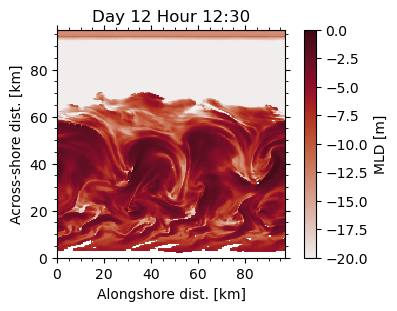

In [12]:
ncols = 1
fig, ax = plt.subplots(1,1, figsize = (4,3), constrained_layout = True, sharex = True, sharey = True)

m = ax.pcolormesh(xrho, yrho, mld[300], cmap = cmo.amp, vmin = -20, vmax = 0)
ax.set(xlim=[0,97], ylim=[0,97])
ax.set_ylabel('Across-shore dist. [km]')
ax.set_xlabel('Alongshore dist. [km]')

ax.set_xticks(np.arange(0,100,20))
ax.minorticks_on()
ax.tick_params(which = 'both',bottom=True, top=True, left=True, right=True)
ax.tick_params(which = 'both',labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.set_aspect('equal')

fig.colorbar(m, ax = ax, label = 'MLD [m]')
ax.set_title('Day 12 Hour 12:30')
# plt.savefig('mld_example.jpg', dpi = 600, bbox_inches='tight')

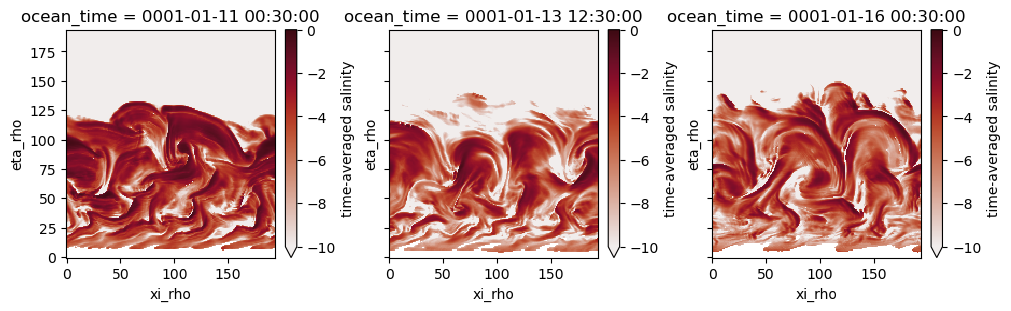

In [13]:
ncols = 3
fig, ax = plt.subplots(1,3, figsize = (10,3), constrained_layout = True, sharex = True, sharey = True)

mld[240].plot(ax = ax[0], vmin = -10, vmax = 0, cmap = cmo.amp)
mld[300].plot(ax = ax[1], vmin = -10, vmax = 0, cmap = cmo.amp)
mld[360].plot(ax = ax[2], vmin = -10, vmax = 0, cmap = cmo.amp)

# for i in range(ncols):
    

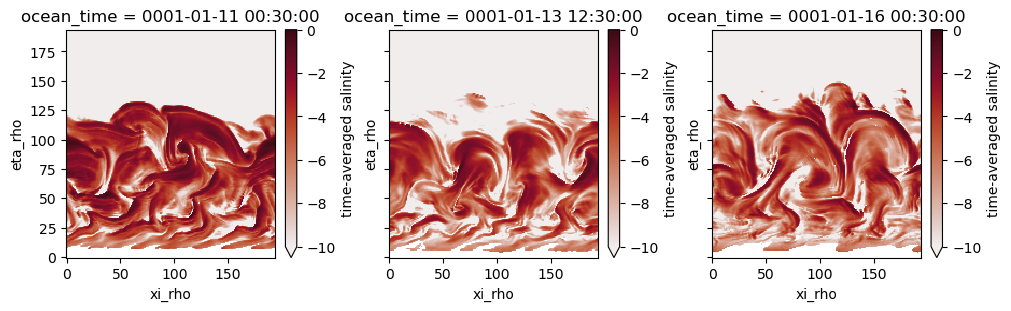

In [16]:
fig, ax = plt.subplots(1,3, figsize = (10,3), constrained_layout = True, sharex = True, sharey = True)

mld1[240].plot(ax = ax[0], vmin = -10, vmax = 0, cmap = cmo.amp)
mld1[300].plot(ax = ax[1], vmin = -10, vmax = 0, cmap = cmo.amp)
mld1[360].plot(ax = ax[2], vmin = -10, vmax = 0, cmap = cmo.amp)

/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


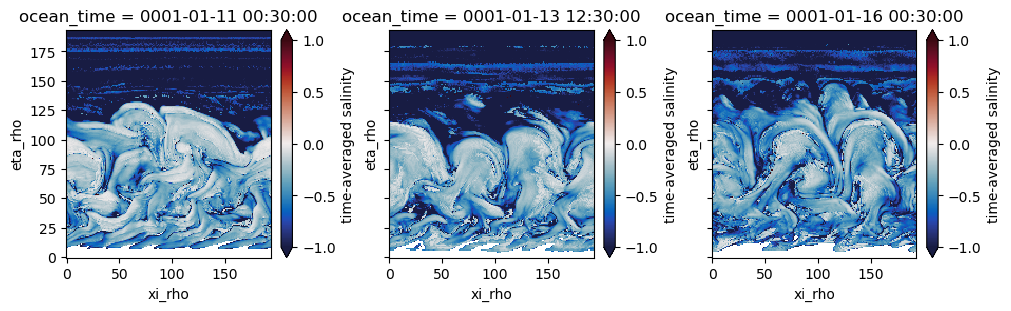

In [25]:
fig, ax = plt.subplots(1,3, figsize = (10,3), constrained_layout = True, sharex = True, sharey = True)

(mld1[240]-mld[240]).plot(ax = ax[0], vmin = -1, vmax = 1, cmap = cmo.balance)
(mld1[300]-mld[300]).plot(ax = ax[1], vmin = -1, vmax = 1, cmap = cmo.balance)
(mld1[360]-mld[360]).plot(ax = ax[2], vmin = -1, vmax = 1, cmap = cmo.balance)

In [13]:
# fig, ax = plt.subplots(1,3, figsize = (10,3), constrained_layout = True)

# mld.plot(x='x_rho',y='y_rho',ax = ax[0],cmap = cmo.deep, vmax = 0, vmin = -10, add_colorbar=False,levels=10)
# mld1.plot(x='x_rho',y='y_rho',ax = ax[1],cmap = cmo.deep, vmax = 0, vmin = -10, add_colorbar=False,levels=10)
# mld2.plot(x='x_rho',y='y_rho',ax = ax[2],cmap = cmo.deep, vmax = 0, vmin = -10,cbar_kwargs={'label':r'Mixed layer depth [m]','ticks':np.linspace(-10,0,11)},levels=10)

# ax[0].set_title('Threshold = 0.03 kg/m$^3$')
# ax[1].set_title('Threshold = 0.02 kg/m$^3$')
# ax[2].set_title('Threshold = 0.01 kg/m$^3$')

# # for i in range(3):
# #     for j in range(3):
# #         ax[i,j].set_xlabel('')
# #         ax[i,j].set_ylabel('')
# #         ax[1,i].set_title('')
# #         ax[2,i].set_title('')
# #         ax[0,i].set_xticklabels('')
# #         ax[1,i].set_xticklabels('')
# # ax[0,1].set_yticklabels('')
# # ax[0,2].set_yticklabels('')
# # ax[1,1].set_yticklabels('')
# # ax[1,2].set_yticklabels('')
# # ax[2,1].set_yticklabels('')
# # ax[2,2].set_yticklabels('')

# for i in range(3):
#     ax[i].set_yticks([10000,20000,30000,40000,50000])
#     ax[i].set_yticklabels(['10','20','30','40','50'])
#     ax[i].set_xticks([20000,40000,60000,80000])
#     ax[i].set_xticklabels(['20','40','60','80'])
#     ax[i].set_ylabel('Across-shelf distance [km]')
#     ax[i].set_xlabel('Along-shelf distance [km]')
#     # ax[i].set_aspect(50/97)


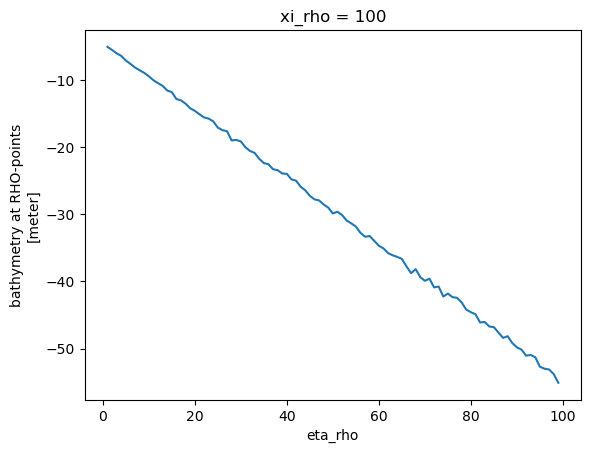

In [79]:
(-ds.h[1:100,100]).plot()

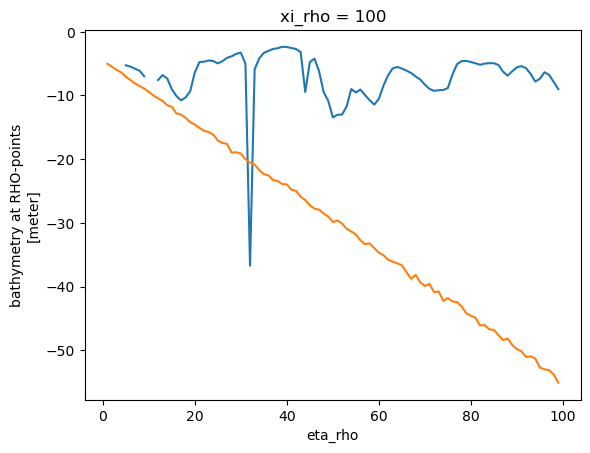

In [15]:
mld[300,1:100,100].plot()
(-ds.h[1:100,100]).plot()

In [16]:
akr_rho = grid.interp(ds.AKr,'Z')

mnum_z1 = ((ds.dye_03*ds.dz).where(ds.z_rho>-1)).sum('s_rho')
mphy_z1 = ((akr_rho*ds.dz).where(ds.z_rho>-1)).sum('s_rho')

mnum_zmld = ((ds.dye_03*ds.dz).where(ds.z_rho>mld)).sum('s_rho')
mphy_zmld = ((akr_rho*ds.dz).where(ds.z_rho>mld)).sum('s_rho')

mnum_zall = (ds.dye_03*ds.dz).sum('s_rho')
mphy_zall = (akr_rho*ds.dz).sum('s_rho')


mtot = (ds.dye_03+akr_rho)

mtot_z1 = (mtot*ds.dz).where(ds.z_rho>-1).sum('s_rho')
mtot_zmld = (mtot*ds.dz).where(ds.z_rho>mld).sum('s_rho')
mtot_zall = (mtot*ds.dz).sum('s_rho')

In [17]:
mnum_z5 = ((ds.dye_03*ds.dz).where(ds.z_rho>-5)).sum('s_rho')
mphy_z5 = ((akr_rho*ds.dz).where(ds.z_rho>-5)).sum('s_rho')
mtot_z5 = (mtot*ds.dz).where(ds.z_rho>-5).sum('s_rho')

In [18]:
print(mphy_z5[240,1:100,1:-1].values.sum()/(mtot_z5[240,1:100,1:-1].values).sum())
print(mnum_z5[240,1:100,1:-1].values.sum()/(mtot_z5[240,1:100,1:-1].values).sum())

0.8365033786742004
0.16349662158154268


### Day 10

In [19]:
print(mphy_z1[240,1:100,1:-1].values.sum()/(mtot_z1[240,1:100,1:-1].values).sum())
print(mnum_z1[240,1:100,1:-1].values.sum()/(mtot_z1[240,1:100,1:-1].values).sum())

print(mphy_zmld[240,1:100,1:-1].values.sum()/(mtot_zmld[240,1:100,1:-1].values).sum())
print(mnum_zmld[240,1:100,1:-1].values.sum()/(mtot_zmld[240,1:100,1:-1].values).sum())

print(mphy_zall[240,1:100,1:-1].values.sum()/(mtot_zall[240,1:100,1:-1].values).sum())
print(mnum_zall[240,1:100,1:-1].values.sum()/(mtot_zall[240,1:100,1:-1].values).sum())

0.47203111627514244
0.5279688845666431


/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


0.5034718066060272
0.4965281934864307
0.7923772638338895
0.2076227371580239


In [22]:
print(mphy_z1[240,1:-2,1:-1].values.sum()/(mtot_z1[240,1:-2,1:-1].values).sum())
print(mnum_z1[240,1:-2,1:-1].values.sum()/(mtot_z1[240,1:-2,1:-1].values).sum())

print(mphy_zmld[240,1:-2,1:-1].values.sum()/(mtot_zmld[240,1:-2,1:-1].values).sum())
print(mnum_zmld[240,1:-2,1:-1].values.sum()/(mtot_zmld[240,1:-2,1:-1].values).sum())

print(mphy_zall[240,1:-2,1:-1].values.sum()/(mtot_zall[240,1:-2,1:-1].values).sum())
print(mnum_zall[240,1:-2,1:-1].values.sum()/(mtot_zall[240,1:-2,1:-1].values).sum())

0.3173989889221929
0.682601011848614
0.2386885716857357
0.7613114290100982
0.7569447942509578
0.24305520663682395


In [23]:
print(mphy_z1[240,1:150,1:-1].values.sum()/(mtot_z1[240,1:150,1:-1].values).sum())
print(mnum_z1[240,1:150,1:-1].values.sum()/(mtot_z1[240,1:150,1:-1].values).sum())

print(mphy_zmld[240,1:150,1:-1].values.sum()/(mtot_zmld[240,1:150,1:-1].values).sum())
print(mnum_zmld[240,1:150,1:-1].values.sum()/(mtot_zmld[240,1:150,1:-1].values).sum())

print(mphy_zall[240,1:150,1:-1].values.sum()/(mtot_zall[240,1:150,1:-1].values).sum())
print(mnum_zall[240,1:150,1:-1].values.sum()/(mtot_zall[240,1:150,1:-1].values).sum())

0.3173990026716134
0.6826009980991937
0.23868851967882565
0.7613114810170101
0.7569446972077609
0.2430553036800213


In [24]:
print(mphy_z1[240,1:20,1:-1].values.sum()/(mtot_z1[240,1:20,1:-1].values).sum())
print(mnum_z1[240,1:20,1:-1].values.sum()/(mtot_z1[240,1:20,1:-1].values).sum())
print(mphy_zall[240,1:20,1:-1].values.sum()/(mtot_zall[240,1:20,1:-1].values).sum())
print(mnum_zall[240,1:20,1:-1].values.sum()/(mtot_zall[240,1:20,1:-1].values).sum())

-0.031130487710274685
1.0311304890981792
0.6964713991865998
0.30352860041171364


In [24]:
print(mphy_z1[240,20:150,1:-1].values.sum()/(mtot_z1[240,20:150,1:-1].values).sum())
print(mnum_z1[240,20:150,1:-1].values.sum()/(mtot_z1[240,20:150,1:-1].values).sum())

print(mphy_zmld[240,20:150,1:-1].values.sum()/(mtot_zmld[240,20:150,1:-1].values).sum())
print(mnum_zmld[240,20:150,1:-1].values.sum()/(mtot_zmld[240,20:150,1:-1].values).sum())

print(mphy_zall[240,20:150,1:-1].values.sum()/(mtot_zall[240,20:150,1:-1].values).sum())
print(mnum_zall[240,20:150,1:-1].values.sum()/(mtot_zall[240,20:150,1:-1].values).sum())

0.31606516298259874
0.6839348377905701
0.22875604200061048
0.7712439586963147
0.7578841033247697
0.24211589758304325


### Day 12.5 

In [25]:
print(mphy_z1[300,1:100,1:-1].values.sum()/(mtot_z1[300,1:100,1:-1].values).sum())
print(mnum_z1[300,1:100,1:-1].values.sum()/(mtot_z1[300,1:100,1:-1].values).sum())

print(mphy_zmld[300,1:100,1:-1].values.sum()/(mtot_zmld[300,1:100,1:-1].values).sum())
print(mnum_zmld[300,1:100,1:-1].values.sum()/(mtot_zmld[300,1:100,1:-1].values).sum())

print(mphy_zall[300,1:100,1:-1].values.sum()/(mtot_zall[300,1:100,1:-1].values).sum())
print(mnum_zall[300,1:100,1:-1].values.sum()/(mtot_zall[300,1:100,1:-1].values).sum())

0.7561109544136098
0.2438890435316502
0.8850053720809069
0.11499462833812905
0.8946181031869465
0.1053818965576367


### Day 15

In [26]:
print(mphy_z1[360,1:100,1:-1].values.sum()/(mtot_z1[360,1:100,1:-1].values).sum())
print(mnum_z1[360,1:100,1:-1].values.sum()/(mtot_z1[360,1:100,1:-1].values).sum())

print(mphy_zmld[360,1:100,1:-1].values.sum()/(mtot_zmld[360,1:100,1:-1].values).sum())
print(mnum_zmld[360,1:100,1:-1].values.sum()/(mtot_zmld[360,1:100,1:-1].values).sum())

print(mphy_zall[360,1:100,1:-1].values.sum()/(mtot_zall[360,1:100,1:-1].values).sum())
print(mnum_zall[360,1:100,1:-1].values.sum()/(mtot_zall[360,1:100,1:-1].values).sum())

0.08272541362586641
0.9172745847739519
1.1509862516295133
-0.15098625030569027
0.8238811509502353
0.17611884907950745


In [27]:
print(mphy_z1[360,1:-1,1:-1].values.sum()/(mtot_z1[360,1:-1,1:-1].values).sum())
print(mnum_z1[360,1:-1,1:-1].values.sum()/(mtot_z1[360,1:-1,1:-1].values).sum())

print(mphy_zmld[360,1:-1,1:-1].values.sum()/(mtot_zmld[360,1:-1,1:-1].values).sum())
print(mnum_zmld[360,1:-1,1:-1].values.sum()/(mtot_zmld[360,1:-1,1:-1].values).sum())

print(mphy_zall[360,1:-1,1:-1].values.sum()/(mtot_zall[360,1:-1,1:-1].values).sum())
print(mnum_zall[360,1:-1,1:-1].values.sum()/(mtot_zall[360,1:-1,1:-1].values).sum())

0.13471981421509754
0.8652801855516359
0.9082688443220147
0.09173115542490042
0.8460972328845622
0.15390276706571912


### Repeat but only quantify up to 60 km in the offshore direction

In [30]:
#Find the index 
ds.y_rho[:121,0][-1].values

array(60250.)

In [34]:
mphy_z1[360,1:121,1:-1].y_rho[:,0][-1].values

array(60250.)

### Plot MLD here just to visualize 

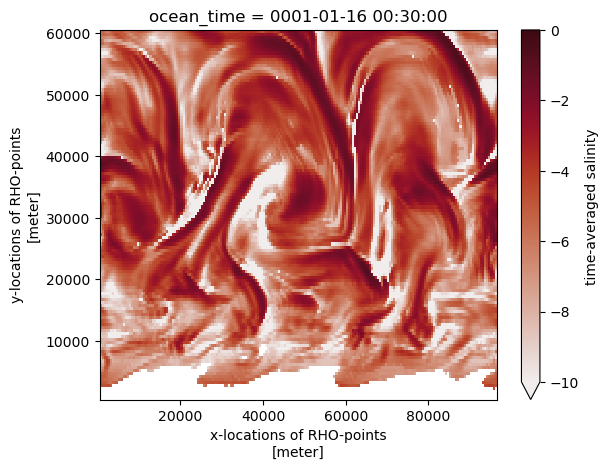

In [39]:
mld[360,1:121,1:-1].plot(x = 'x_rho', y = 'y_rho', cmap = cmo.amp, vmin = -10, vmax = 0)

In [40]:
mld[360,1:121,1:-1].mean().values

/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


array(-5.42036625)

In [31]:
print(mphy_z1[360,1:121,1:-1].values.sum()/(mtot_z1[360,1:121,1:-1].values).sum())
print(mnum_z1[360,1:121,1:-1].values.sum()/(mtot_z1[360,1:121,1:-1].values).sum())

print(mphy_zmld[360,1:121,1:-1].values.sum()/(mtot_zmld[360,1:121,1:-1].values).sum())
print(mnum_zmld[360,1:121,1:-1].values.sum()/(mtot_zmld[360,1:121,1:-1].values).sum())

print(mphy_zall[360,1:121,1:-1].values.sum()/(mtot_zall[360,1:121,1:-1].values).sum())
print(mnum_zall[360,1:121,1:-1].values.sum()/(mtot_zall[360,1:121,1:-1].values).sum())

0.10714708068130353
0.8928529189333699
0.885316197950673
0.11468380136640853
0.8258691670717151
0.17413083286397482


In [ ]:
print(mphy_z1[360,1:121,1:-1].values.sum()/(mtot_z1[360,1:121,1:-1].values).sum())
print(mnum_z1[360,1:121,1:-1].values.sum()/(mtot_z1[360,1:121,1:-1].values).sum())

print(mphy_zmld[360,1:121,1:-1].values.sum()/(mtot_zmld[360,1:121,1:-1].values).sum())
print(mnum_zmld[360,1:121,1:-1].values.sum()/(mtot_zmld[360,1:121,1:-1].values).sum())

print(mphy_zall[360,1:121,1:-1].values.sum()/(mtot_zall[360,1:121,1:-1].values).sum())
print(mnum_zall[360,1:121,1:-1].values.sum()/(mtot_zall[360,1:121,1:-1].values).sum())

### Repeat but with a more conservative threshold 

In [45]:
mnum_zmld1 = ((ds.dye_03*ds.dz).where(ds.z_rho>mld1)).sum('s_rho')
mphy_zmld1 = ((akr_rho*ds.dz).where(ds.z_rho>mld1)).sum('s_rho')
mtot_zmld1 = (mtot*ds.dz).where(ds.z_rho>mld1).sum('s_rho')

In [47]:
print(mphy_zmld1[240,1:100,1:-1].values.sum()/(mtot_zmld1[240,1:100,1:-1].values).sum())
print(mnum_zmld1[240,1:100,1:-1].values.sum()/(mtot_zmld1[240,1:100,1:-1].values).sum())

print(mphy_zmld1[300,1:100,1:-1].values.sum()/(mtot_zmld1[300,1:100,1:-1].values).sum())
print(mnum_zmld1[300,1:100,1:-1].values.sum()/(mtot_zmld1[300,1:100,1:-1].values).sum())

print(mphy_zmld1[360,1:100,1:-1].values.sum()/(mtot_zmld1[360,1:100,1:-1].values).sum())
print(mnum_zmld1[360,1:100,1:-1].values.sum()/(mtot_zmld1[360,1:100,1:-1].values).sum())

0.5847659044914288
0.41523409578101683
0.9366673063050001
0.06333269379292727
1.158545862783186
-0.15854586176134203


### Now repeat this but add an additional statement that removes values that are spurious by selecting only lighter than the greater depth 

In [81]:
mld2 = mld.where(mld>(-ds.h))

In [82]:
mnum_zmld2 = ((ds.dye_03*ds.dz).where(ds.z_rho>mld2)).sum('s_rho')
mphy_zmld2 = ((akr_rho*ds.dz).where(ds.z_rho>mld2)).sum('s_rho')
mtot_zmld2 = (mtot*ds.dz).where(ds.z_rho>mld2).sum('s_rho')

print(mphy_zmld2[240,1:100,1:-1].values.sum()/(mtot_zmld2[240,1:100,1:-1].values).sum())
print(mnum_zmld2[240,1:100,1:-1].values.sum()/(mtot_zmld2[240,1:100,1:-1].values).sum())

print(mphy_zmld2[300,1:100,1:-1].values.sum()/(mtot_zmld2[300,1:100,1:-1].values).sum())
print(mnum_zmld2[300,1:100,1:-1].values.sum()/(mtot_zmld2[300,1:100,1:-1].values).sum())

print(mphy_zmld2[360,1:100,1:-1].values.sum()/(mtot_zmld2[360,1:100,1:-1].values).sum())
print(mnum_zmld2[360,1:100,1:-1].values.sum()/(mtot_zmld2[360,1:100,1:-1].values).sum())

/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


0.5166450927127377
0.4833549075092662
0.8840666784837142
0.11593332163607069
1.1441118678366187
-0.14411186594164765


### So the ratio of numerical mixing to total mixing is highly spatially and temporally heterogenous. 
Present statistics for initially stratified region only - as numerical mixing is more important outside of this region 

### Plot the values at day 10 

In [38]:
xrho = (ds.x_rho/1000).values
yrho = (ds.y_rho/1000).values

sfill3 = sgradmag[240].where(sgradmag[240]>1e-6)
sfill03 = sfill3.fillna(value=1e-6)

In [41]:
print(nDGQ2[240,-1].min().values,nDGQ2[240,-1].max().values)
print(delta[240,-1].min().values,delta[240,-1].max().values)
print(np.log10(sfill03).min().values,np.log10(sfill03).max().values)

/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/array/reductions.py:579: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


-2.5942103996590054 7.257452973551757
-6.851309537887573 3.166257292032242
-6.0 -2.7649257786451304


In [42]:
delta[240,-1].ocean_time.values

array(cftime.DatetimeProlepticGregorian(1, 1, 11, 0, 30, 0, 0, has_year_zero=True),
      dtype=object)

In [ ]:
### Repeat calculatinos but 

In [45]:
print(mphy_z1[240].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values/(mtot_z1[240].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values))
print(mnum_z1[240].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values/(mtot_z1[240].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values))

print(mphy_zmld[240].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values/(mtot_zmld[240].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values))
print(mnum_zmld[240].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values/(mtot_zmld[240].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values))

print(mphy_zall[240].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values/(mtot_zall[240].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values))
print(mnum_zall[240].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values/(mtot_zall[240].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values))

0.4033474231260894
0.5966525780983128


/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


0.39252989344003186


/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


0.6074701073486516
0.790788850591717
0.20921115026171724


In [47]:
mld[300].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).mean().values

SyntaxError: unexpected EOF while parsing (3359281210.py, line 1)

In [46]:
print(mphy_z1[300].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values/(mtot_z1[300].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values))
print(mnum_z1[300].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values/(mtot_z1[300].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values))

print(mphy_zmld[300].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values/(mtot_zmld[300].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values))
print(mnum_zmld[300].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values/(mtot_zmld[300].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values))

print(mphy_zall[300].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values/(mtot_zall[300].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values))
print(mnum_zall[300].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values/(mtot_zall[300].where(ds.y_rho<60000).isel(xi_rho = slice(1,-1)).sum(skipna=True).values))

0.4570948707648966
0.5429051305429708


/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


0.7713683603514963


/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


0.22863164058613508
0.8919620399651296
0.10803795983894877


In [ ]:
xrho = (ds.x_rho/1000).values
yrho = (ds.y_rho/1000).values

sfill3 = sgradmag[240].where(sgradmag[240]>1e-6)
sfill03 = sfill3.fillna(value=1e-6)

/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/tmp/ipykernel_24592/2956726118.py:18: RuntimeWarning: divide by zero encountered in log10
  m4 = ax[1,1].pcolormesh(xrho, yrho, np.log10((mphy_z1[240].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
/tmp/ipykernel_24592/2956726118.py:24: RuntimeWarning: divide by zero encountered in log10
  m6 = ax[2,0].pcolormesh(xrho, yrho, np.log10((np.abs(mnum_zmld[240].values))), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
/tmp/ipykernel_24592/2956726118.py:27: RuntimeWarning: divide by zero encountered in log10
  m7 = ax[2,1].pcolormesh(xrho, yrho, np.log10((mphy_zmld[240].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
/tmp/ipykernel_24592/2956726118.py:30: RuntimeWarning: divide by zero encountered in log10
  m8 = ax[2,2].pcolormesh(xrho, yrho, np.log10(

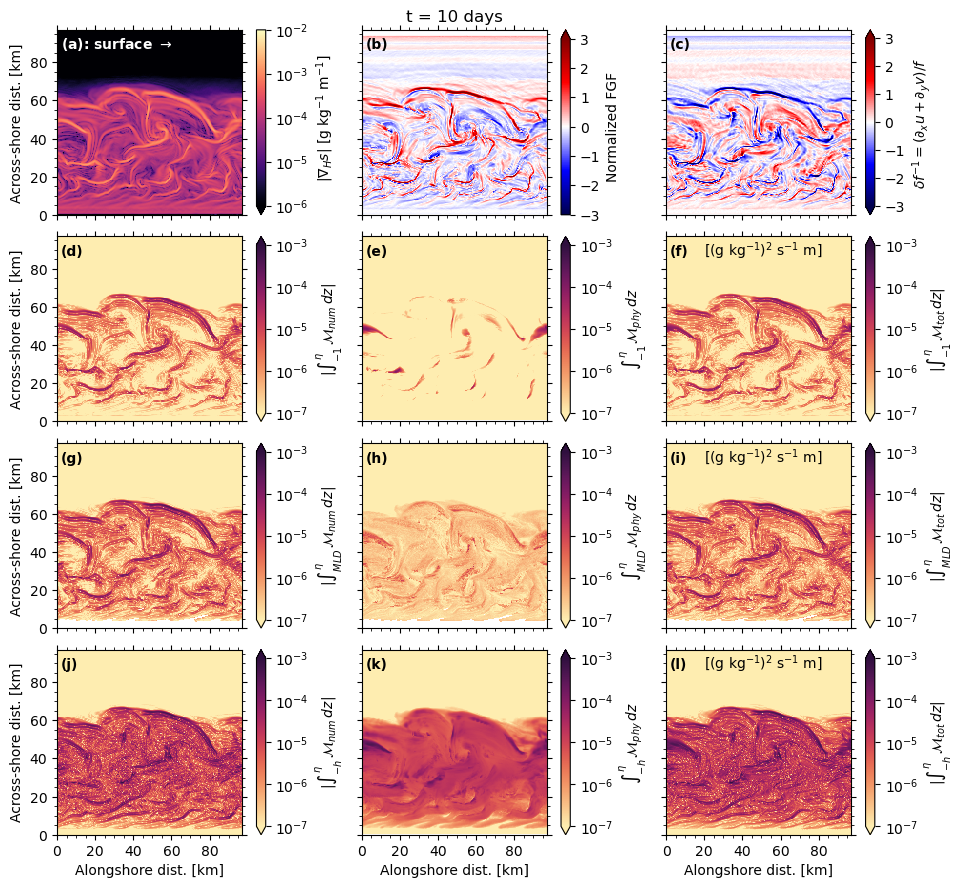

In [85]:
xrho = (ds.x_rho/1000).values
yrho = (ds.y_rho/1000).values

sfill3 = sgradmag[240].where(sgradmag[240]>1e-6)
sfill03 = sfill3.fillna(value=1e-6)


fig, ax = plt.subplots(4,3, figsize = ((7/2)*2.7,(8.66/4)*4.05), constrained_layout = True)

m0 = ax[0,0].pcolormesh(xrho, yrho, np.log10(sfill03), cmap = plt.get_cmap('magma'), vmin = -6, vmax = -2)
cbar = fig.colorbar(m0, ax = ax[0,0], label = '', extend = 'min', format=tick.FormatStrFormatter('$10^{%d}$'))
cbar.ax.set_ylabel(r'$|\nabla_H s|$ [g kg$^{-1}$ m$^{-1}$]')

m1 = ax[0,1].pcolormesh(xrho, yrho, nDGQ2[240,-1], cmap = plt.get_cmap('seismic'), vmin = -3, vmax = 3)
cbar = fig.colorbar(m1, ax = ax[0,1], label = '', extend = 'max', ticks = [-3,-2,-1,0,1,2,3])
cbar.ax.set_ylabel(r'Normalized FGF')

m2 = ax[0,2].pcolormesh(xrho, yrho, delta[240,-1], cmap = plt.get_cmap('seismic'), vmin = -3, vmax = 3)
cbar = fig.colorbar(m2, ax = ax[0,2], label = '', extend = 'both', ticks = [-3,-2,-1,0,1,2,3])
cbar.ax.set_ylabel(r'$\delta f^{-1}=(\partial_x u + \partial_y v)/f$')

m3 = ax[1,0].pcolormesh(xrho, yrho, np.log10(np.abs(mnum_z1[240].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m3, ax = ax[1,0], label = r'$|\int_{-1}^\eta \, \mathcal{M}_{num} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m4 = ax[1,1].pcolormesh(xrho, yrho, np.log10((mphy_z1[240].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m4, ax = ax[1,1], label = r'$\int_{-1}^\eta \, \mathcal{M}_{phy} \, dz$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m5 = ax[1,2].pcolormesh(xrho, yrho, np.log10(np.abs(mtot_z1[240].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m5, ax = ax[1,2], label = r'$|\int_{-1}^\eta \, \mathcal{M}_{tot} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m6 = ax[2,0].pcolormesh(xrho, yrho, np.log10((np.abs(mnum_zmld[240].values))), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m6, ax = ax[2,0], label = r'$|\int_{MLD}^\eta \, \mathcal{M}_{num} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m7 = ax[2,1].pcolormesh(xrho, yrho, np.log10((mphy_zmld[240].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m6, ax = ax[2,1], label = r'$\int_{MLD}^\eta \, \mathcal{M}_{phy} \, dz$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m8 = ax[2,2].pcolormesh(xrho, yrho, np.log10(np.abs(mtot_zmld[240].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m6, ax = ax[2,2], label = r'$|\int_{MLD}^\eta \, \mathcal{M}_{tot} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m9 = ax[3,0].pcolormesh(xrho, yrho, np.log10((np.abs(mnum_zall[240].values))), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m6, ax = ax[3,0], label = r'$|\int_{-h}^\eta \, \mathcal{M}_{num} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m10 = ax[3,1].pcolormesh(xrho, yrho, np.log10((mphy_zall[240].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m6, ax = ax[3,1], label = r'$\int_{-h}^\eta \, \mathcal{M}_{phy} \, dz$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m11 = ax[3,2].pcolormesh(xrho, yrho, np.log10(np.abs(mtot_zall[240].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m6, ax = ax[3,2], label = r'$|\int_{-h}^\eta \, \mathcal{M}_{tot} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

for i in range(4):
    for j in range(3):
        ax[i,j].set(xlim=[0,97], ylim=[0,97])
        ax[i,0].set_ylabel('Across-shore dist. [km]')
        ax[-1,j].set_xlabel('Alongshore dist. [km]')
        ax[i,1].set_yticklabels([])
        ax[i,2].set_yticklabels([])
        ax[0,j].set_xticklabels([])
        ax[1,j].set_xticklabels([])
        ax[2,j].set_xticklabels([])
        ax[i,j].set_xticks(np.arange(0,100,20))
        ax[i,j].minorticks_on()
        ax[i,j].tick_params(which = 'both',bottom=True, top=True, left=True, right=True)
        ax[i,j].tick_params(which = 'both',labelbottom=True, labeltop=False, labelleft=True, labelright=False)
        ax[i,j].set_aspect('equal')

ax[0,0].text(2,87, r'(a): surface $\rightarrow{}$', fontweight = 'semibold', color = 'white')
ax[0,1].text(2,87, '(b)', fontweight = 'semibold')
ax[0,2].text(2,87, '(c)', fontweight = 'semibold')
ax[1,0].text(2,87, '(d)', fontweight = 'semibold')
# ax[1,0].text(20,87, '$\mathcal{M}_{num}/\mathcal{M}_{tot}= 0.61$')
ax[1,1].text(2,87, '(e)', fontweight = 'semibold')
# ax[1,1].text(20,87, '$\mathcal{M}_{phy}/\mathcal{M}_{tot}= 0.39$')
ax[1,2].text(2,87, '(f)', fontweight = 'semibold')
ax[1,2].text(20,87, '[(g kg$^{-1}$)$^2$ s$^{-1}$ m]')
ax[2,0].text(2,87, '(g)', fontweight = 'semibold')
# ax[2,0].text(20,87, '$\mathcal{M}_{num}/\mathcal{M}_{tot}= 0.19$')
ax[2,1].text(2,87, '(h)', fontweight = 'semibold')
# ax[2,1].text(20,87, '$\mathcal{M}_{phy}/\mathcal{M}_{tot}= 0.81$')
ax[2,2].text(2,87, '(i)', fontweight = 'semibold')
ax[2,2].text(20,87, '[(g kg$^{-1}$)$^2$ s$^{-1}$ m]')
ax[3,0].text(2,87, '(j)', fontweight = 'semibold')
# ax[2,0].text(20,87, '$\mathcal{M}_{num}/\mathcal{M}_{tot}= 0.19$')
ax[3,1].text(2,87, '(k)', fontweight = 'semibold')
# ax[2,1].text(20,87, '$\mathcal{M}_{phy}/\mathcal{M}_{tot}= 0.81$')
ax[3,2].text(2,87, '(l)', fontweight = 'semibold')
ax[3,2].text(20,87, '[(g kg$^{-1}$)$^2$ s$^{-1}$ m]')
ax[0,1].set_title('t = 10 days')
plt.savefig('base_case_day_10.png', dpi = 500, bbox_inches='tight')

In [42]:
print(mphy_z1[360,1:121,1:-1].values.sum()/(mtot_z1[360,1:121,1:-1].values).sum())
print(mnum_z1[360,1:121,1:-1].values.sum()/(mtot_z1[360,1:121,1:-1].values).sum())

print(mphy_zmld[360,1:121,1:-1].values.sum()/(mtot_zmld[360,1:121,1:-1].values).sum())
print(mnum_zmld[360,1:121,1:-1].values.sum()/(mtot_zmld[360,1:121,1:-1].values).sum())

print(mphy_zall[360,1:121,1:-1].values.sum()/(mtot_zall[360,1:121,1:-1].values).sum())
print(mnum_zall[360,1:121,1:-1].values.sum()/(mtot_zall[360,1:121,1:-1].values).sum())

0.10714708068130353
0.8928529189333699
0.885316197950673
0.11468380136640853
0.8258691670717151
0.17413083286397482


### Save this figure for the manuscript 

/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/tmp/ipykernel_12179/3682151578.py:24: RuntimeWarning: divide by zero encountered in log10
  m4 = ax[1,1].pcolormesh(xrho, yrho, np.log10((mphy_z1[360].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -8, vmax = -4)
/tmp/ipykernel_12179/3682151578.py:30: RuntimeWarning: divide by zero encountered in log10
  m6 = ax[2,0].pcolormesh(xrho, yrho, np.log10((np.abs(mnum_zmld[360].values))), cmap = plt.get_cmap('cmo.matter'), vmin = -8, vmax = -4)
/tmp/ipykernel_12179/3682151578.py:33: RuntimeWarning: divide by zero encountered in log10
  m7 = ax[2,1].pcolormesh(xrho, yrho, np.log10((mphy_zmld[360].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -8, vmax = -4)
/tmp/ipykernel_12179/3682151578.py:36: RuntimeWarning: divide by zero encountered in log10
  m8 = ax[2,2].pcolormesh(xrho, yrho, np.log10(

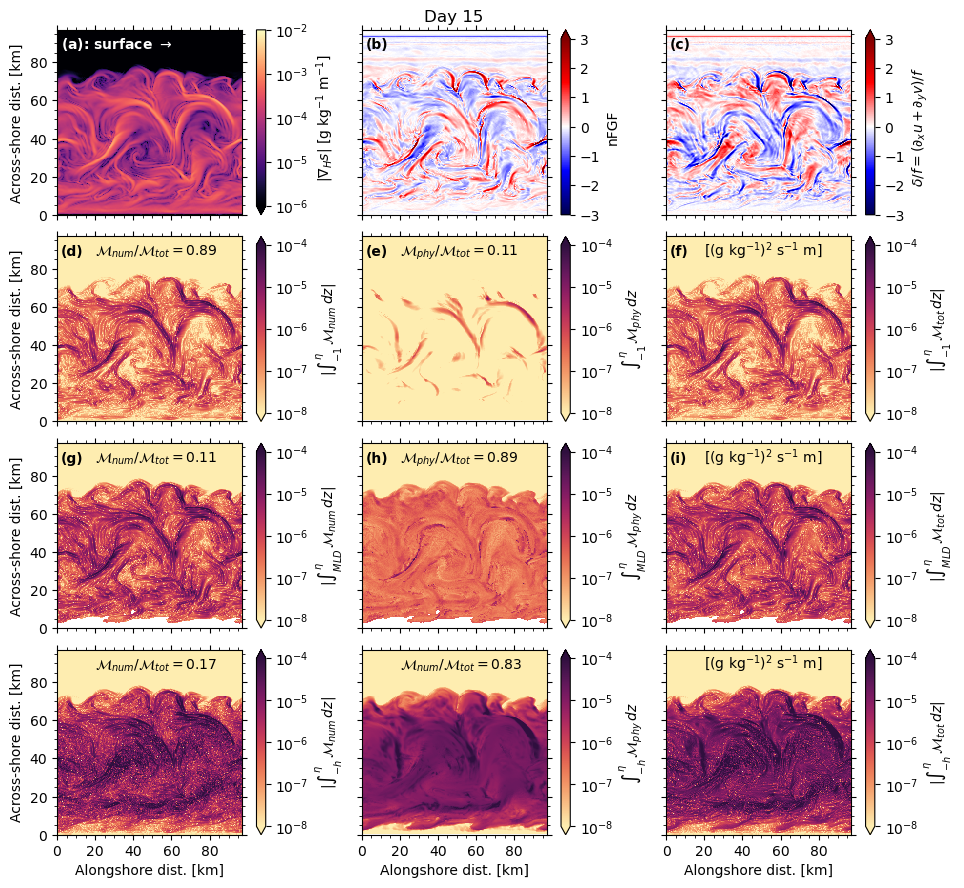

In [50]:
fig, ax = plt.subplots(4,3, figsize = ((7/2)*2.7,(8.66/4)*4.05), constrained_layout = True)

xrho = (ds.x_rho/1000).values
yrho = (ds.y_rho/1000).values

sfill3 = sgradmag[360].where(sgradmag[360]>1e-6)
sfill03 = sfill3.fillna(value=1e-6)

m0 = ax[0,0].pcolormesh(xrho, yrho, np.log10(sfill03), cmap = plt.get_cmap('magma'), vmin = -6, vmax = -2)
cbar = fig.colorbar(m0, ax = ax[0,0], label = '', extend = 'min', format=tick.FormatStrFormatter('$10^{%d}$'))
cbar.ax.set_ylabel(r'$|\nabla_H s|$ [g kg$^{-1}$ m$^{-1}$]')

m1 = ax[0,1].pcolormesh(xrho, yrho, nDGQ2[360,-1], cmap = plt.get_cmap('seismic'), vmin = -3, vmax = 3)
cbar = fig.colorbar(m1, ax = ax[0,1], label = '', extend = 'max', ticks = [-3,-2,-1,0,1,2,3])
cbar.ax.set_ylabel(r'nFGF')

m2 = ax[0,2].pcolormesh(xrho, yrho, delta[360,-1], cmap = plt.get_cmap('seismic'), vmin = -3, vmax = 3)
cbar = fig.colorbar(m2, ax = ax[0,2], label = '', extend = 'max', ticks = [-3,-2,-1,0,1,2,3])
cbar.ax.set_ylabel(r'$\delta/f=(\partial_x u + \partial_y v)/f$')

m3 = ax[1,0].pcolormesh(xrho, yrho, np.log10(np.abs(mnum_z1[360].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -8, vmax = -4)
cbar = fig.colorbar(m3, ax = ax[1,0], label = r'$|\int_{-1}^\eta \, \mathcal{M}_{num} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m4 = ax[1,1].pcolormesh(xrho, yrho, np.log10((mphy_z1[360].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -8, vmax = -4)
cbar = fig.colorbar(m4, ax = ax[1,1], label = r'$\int_{-1}^\eta \, \mathcal{M}_{phy} \, dz$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m5 = ax[1,2].pcolormesh(xrho, yrho, np.log10(np.abs(mtot_z1[360].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -8, vmax = -4)
cbar = fig.colorbar(m5, ax = ax[1,2], label = r'$|\int_{-1}^\eta \, \mathcal{M}_{tot} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m6 = ax[2,0].pcolormesh(xrho, yrho, np.log10((np.abs(mnum_zmld[360].values))), cmap = plt.get_cmap('cmo.matter'), vmin = -8, vmax = -4)
cbar = fig.colorbar(m6, ax = ax[2,0], label = r'$|\int_{MLD}^\eta \, \mathcal{M}_{num} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m7 = ax[2,1].pcolormesh(xrho, yrho, np.log10((mphy_zmld[360].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -8, vmax = -4)
cbar = fig.colorbar(m6, ax = ax[2,1], label = r'$\int_{MLD}^\eta \, \mathcal{M}_{phy} \, dz$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m8 = ax[2,2].pcolormesh(xrho, yrho, np.log10(np.abs(mtot_zmld[360].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -8, vmax = -4)
cbar = fig.colorbar(m6, ax = ax[2,2], label = r'$|\int_{MLD}^\eta \, \mathcal{M}_{tot} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m9 = ax[3,0].pcolormesh(xrho, yrho, np.log10((np.abs(mnum_zall[360].values))), cmap = plt.get_cmap('cmo.matter'), vmin = -8, vmax = -4)
cbar = fig.colorbar(m6, ax = ax[3,0], label = r'$|\int_{-h}^\eta \, \mathcal{M}_{num} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m10 = ax[3,1].pcolormesh(xrho, yrho, np.log10((mphy_zall[360].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -8, vmax = -4)
cbar = fig.colorbar(m6, ax = ax[3,1], label = r'$\int_{-h}^\eta \, \mathcal{M}_{phy} \, dz$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m11 = ax[3,2].pcolormesh(xrho, yrho, np.log10(np.abs(mtot_zall[360].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -8, vmax = -4)
cbar = fig.colorbar(m6, ax = ax[3,2], label = r'$|\int_{-h}^\eta \, \mathcal{M}_{tot} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

for i in range(4):
    for j in range(3):
        ax[i,j].set(xlim=[0,97], ylim=[0,97])
        ax[i,0].set_ylabel('Across-shore dist. [km]')
        ax[-1,j].set_xlabel('Alongshore dist. [km]')
        ax[i,1].set_yticklabels([])
        ax[i,2].set_yticklabels([])
        ax[0,j].set_xticklabels([])
        ax[1,j].set_xticklabels([])
        ax[2,j].set_xticklabels([])
        ax[i,j].set_xticks(np.arange(0,100,20))
        ax[i,j].minorticks_on()
        ax[i,j].tick_params(which = 'both',bottom=True, top=True, left=True, right=True)
        ax[i,j].tick_params(which = 'both',labelbottom=True, labeltop=False, labelleft=True, labelright=False)
        ax[i,j].set_aspect('equal')

ax[0,0].text(2,87, r'(a): surface $\rightarrow{}$', fontweight = 'semibold', color = 'white')
ax[0,1].text(2,87, '(b)', fontweight = 'semibold')
ax[0,2].text(2,87, '(c)', fontweight = 'semibold')
ax[1,0].text(2,87, '(d)', fontweight = 'semibold')
ax[1,0].text(20,87, '$\mathcal{M}_{num}/\mathcal{M}_{tot}= 0.89$')
ax[1,1].text(2,87, '(e)', fontweight = 'semibold')
ax[1,1].text(20,87, '$\mathcal{M}_{phy}/\mathcal{M}_{tot}= 0.11$')
ax[1,2].text(2,87, '(f)', fontweight = 'semibold')
ax[1,2].text(20,87, '[(g kg$^{-1}$)$^2$ s$^{-1}$ m]')
ax[2,0].text(2,87, '(g)', fontweight = 'semibold')
ax[2,0].text(20,87, '$\mathcal{M}_{num}/\mathcal{M}_{tot}= 0.11$')
ax[2,1].text(2,87, '(h)', fontweight = 'semibold')
ax[2,1].text(20,87, '$\mathcal{M}_{phy}/\mathcal{M}_{tot}= 0.89$')
ax[2,2].text(2,87, '(i)', fontweight = 'semibold')
ax[2,2].text(20,87, '[(g kg$^{-1}$)$^2$ s$^{-1}$ m]')
ax[3,0].text(20,87, '$\mathcal{M}_{num}/\mathcal{M}_{tot}= 0.17$')
ax[3,1].text(20,87, '$\mathcal{M}_{num}/\mathcal{M}_{tot}= 0.83$')
ax[3,2].text(20,87, '[(g kg$^{-1}$)$^2$ s$^{-1}$ m]')
ax[0,1].set_title('Day 15')
plt.savefig('basecase_day_15.png', dpi = 500, bbox_inches='tight')

### Repeat, but don't plot the absolute values 

/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/tmp/ipykernel_12179/3471146535.py:21: RuntimeWarning: invalid value encountered in log10
  m3 = ax[1,0].pcolormesh(xrho, yrho, np.log10(mnum_z1[360].values), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
/tmp/ipykernel_12179/3471146535.py:24: RuntimeWarning: divide by zero encountered in log10
  m4 = ax[1,1].pcolormesh(xrho, yrho, np.log10((mphy_z1[360].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
/tmp/ipykernel_12179/3471146535.py:27: RuntimeWarning: invalid value encountered in log10
  m5 = ax[1,2].pcolormesh(xrho, yrho, np.log10(mtot_z1[360].values), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
/tmp/ipykernel_12179/3471146535.py:30: RuntimeWarning: divide by zero encountered in log10
  m6 = ax[2,0].pcolormesh(xrho, yrho, np.log10(mnum_zmld[360].val

Text(0.5, 1.0, 'Snapshots: t = 15 days')

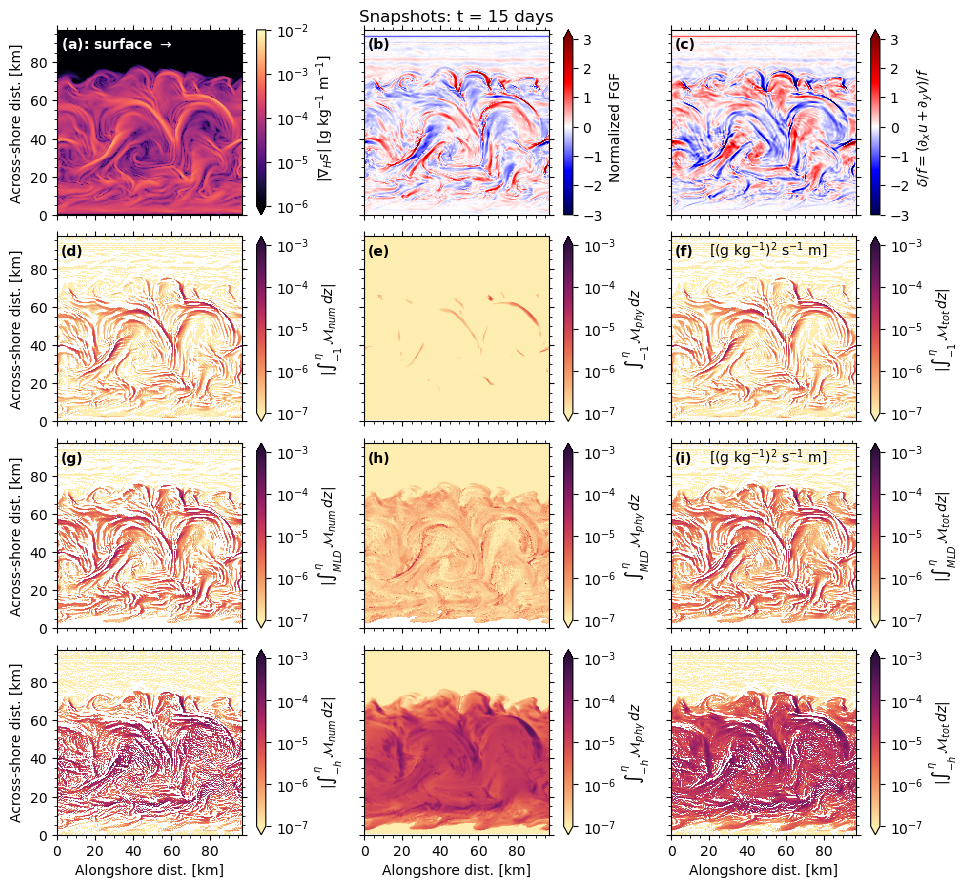

In [45]:
fig, ax = plt.subplots(4,3, figsize = ((7/2)*2.7,(8.66/4)*4.05), constrained_layout = True)

xrho = (ds.x_rho/1000).values
yrho = (ds.y_rho/1000).values

sfill3 = sgradmag[360].where(sgradmag[360]>1e-6)
sfill03 = sfill3.fillna(value=1e-6)

m0 = ax[0,0].pcolormesh(xrho, yrho, np.log10(sfill03), cmap = plt.get_cmap('magma'), vmin = -6, vmax = -2)
cbar = fig.colorbar(m0, ax = ax[0,0], label = '', extend = 'min', format=tick.FormatStrFormatter('$10^{%d}$'))
cbar.ax.set_ylabel(r'$|\nabla_H s|$ [g kg$^{-1}$ m$^{-1}$]')

m1 = ax[0,1].pcolormesh(xrho, yrho, nDGQ2[360,-1], cmap = plt.get_cmap('seismic'), vmin = -3, vmax = 3)
cbar = fig.colorbar(m1, ax = ax[0,1], label = '', extend = 'max', ticks = [-3,-2,-1,0,1,2,3])
cbar.ax.set_ylabel(r'Normalized FGF')

m2 = ax[0,2].pcolormesh(xrho, yrho, delta[360,-1], cmap = plt.get_cmap('seismic'), vmin = -3, vmax = 3)
cbar = fig.colorbar(m2, ax = ax[0,2], label = '', extend = 'max', ticks = [-3,-2,-1,0,1,2,3])
cbar.ax.set_ylabel(r'$\delta/f=(\partial_x u + \partial_y v)/f$')

m3 = ax[1,0].pcolormesh(xrho, yrho, np.log10(mnum_z1[360].values), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m3, ax = ax[1,0], label = r'$|\int_{-1}^\eta \, \mathcal{M}_{num} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m4 = ax[1,1].pcolormesh(xrho, yrho, np.log10((mphy_z1[360].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m4, ax = ax[1,1], label = r'$\int_{-1}^\eta \, \mathcal{M}_{phy} \, dz$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m5 = ax[1,2].pcolormesh(xrho, yrho, np.log10(mtot_z1[360].values), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m5, ax = ax[1,2], label = r'$|\int_{-1}^\eta \, \mathcal{M}_{tot} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m6 = ax[2,0].pcolormesh(xrho, yrho, np.log10(mnum_zmld[360].values), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m6, ax = ax[2,0], label = r'$|\int_{MLD}^\eta \, \mathcal{M}_{num} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m7 = ax[2,1].pcolormesh(xrho, yrho, np.log10((mphy_zmld[360].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m6, ax = ax[2,1], label = r'$\int_{MLD}^\eta \, \mathcal{M}_{phy} \, dz$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m8 = ax[2,2].pcolormesh(xrho, yrho, np.log10(mtot_zmld[360].values), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m6, ax = ax[2,2], label = r'$|\int_{MLD}^\eta \, \mathcal{M}_{tot} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m9 = ax[3,0].pcolormesh(xrho, yrho, np.log10(mnum_zall[360].values), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m6, ax = ax[3,0], label = r'$|\int_{-h}^\eta \, \mathcal{M}_{num} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m10 = ax[3,1].pcolormesh(xrho, yrho, np.log10((mphy_zall[360].values)), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m6, ax = ax[3,1], label = r'$\int_{-h}^\eta \, \mathcal{M}_{phy} \, dz$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

m11 = ax[3,2].pcolormesh(xrho, yrho, np.log10(mtot_zall[360].values), cmap = plt.get_cmap('cmo.matter'), vmin = -7, vmax = -3)
cbar = fig.colorbar(m6, ax = ax[3,2], label = r'$|\int_{-h}^\eta \, \mathcal{M}_{tot} \, dz|$', extend = 'both', format=tick.FormatStrFormatter('$10^{%d}$'))

for i in range(4):
    for j in range(3):
        ax[i,j].set(xlim=[0,97], ylim=[0,97])
        ax[i,0].set_ylabel('Across-shore dist. [km]')
        ax[-1,j].set_xlabel('Alongshore dist. [km]')
        ax[i,1].set_yticklabels([])
        ax[i,2].set_yticklabels([])
        ax[0,j].set_xticklabels([])
        ax[1,j].set_xticklabels([])
        ax[2,j].set_xticklabels([])
        ax[i,j].set_xticks(np.arange(0,100,20))
        ax[i,j].minorticks_on()
        ax[i,j].tick_params(which = 'both',bottom=True, top=True, left=True, right=True)
        ax[i,j].tick_params(which = 'both',labelbottom=True, labeltop=False, labelleft=True, labelright=False)
        ax[i,j].set_aspect('equal')

ax[0,0].text(2,87, r'(a): surface $\rightarrow{}$', fontweight = 'semibold', color = 'white')
ax[0,1].text(2,87, '(b)', fontweight = 'semibold')
ax[0,2].text(2,87, '(c)', fontweight = 'semibold')
ax[1,0].text(2,87, '(d)', fontweight = 'semibold')
# ax[1,0].text(20,87, '$\mathcal{M}_{num}/\mathcal{M}_{tot}= 0.61$')
ax[1,1].text(2,87, '(e)', fontweight = 'semibold')
# ax[1,1].text(20,87, '$\mathcal{M}_{phy}/\mathcal{M}_{tot}= 0.39$')
ax[1,2].text(2,87, '(f)', fontweight = 'semibold')
ax[1,2].text(20,87, '[(g kg$^{-1}$)$^2$ s$^{-1}$ m]')
ax[2,0].text(2,87, '(g)', fontweight = 'semibold')
# ax[2,0].text(20,87, '$\mathcal{M}_{num}/\mathcal{M}_{tot}= 0.19$')
ax[2,1].text(2,87, '(h)', fontweight = 'semibold')
# ax[2,1].text(20,87, '$\mathcal{M}_{phy}/\mathcal{M}_{tot}= 0.81$')
ax[2,2].text(2,87, '(i)', fontweight = 'semibold')
ax[2,2].text(20,87, '[(g kg$^{-1}$)$^2$ s$^{-1}$ m]')
ax[0,1].set_title('Snapshots: t = 15 days')
# plt.savefig('fig5_snapshots_day_15.jpg', dpi = 400, bbox_inches='tight')

## Some interesting trends emerge. 
We can see that the nFGF is negatively correlated with the divergence, which is consistent with Barkan et al. (2019) JPO. Make a scatter plot to investigate further

In [132]:
# d = delta[159:361,-1,1:120,1:-1].load()
# n = nDGQ2[159:361,-1,1:120,1:-1].load()
d = delta[159:361,-1,10:120,1:-1].load() # Remove close to coastal wall bc of water pile up
n = nDGQ2[159:361,-1,10:120,1:-1].load() # Remove close to coastal wall bc of water pile up

/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [133]:
dbins = np.linspace(-5,3,100)
nbins = np.linspace(-3,5,100)
dn_hist = histogram(d,n, bins = [dbins, nbins], dim = ['ocean_time','xi_rho','eta_rho'], density = True).load()

/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


Text(0.5, 1.0, 'Base case: Days 7.5-15')

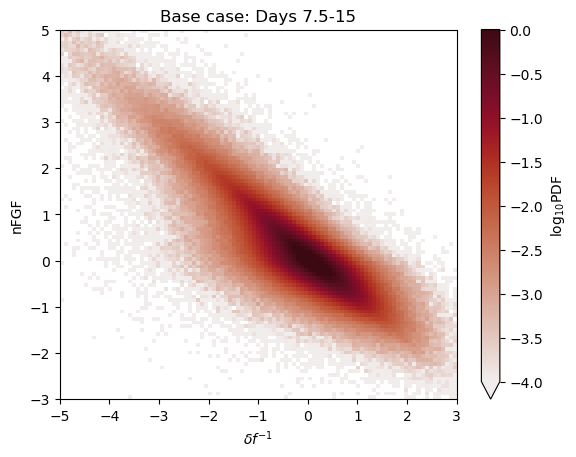

In [134]:
np.log10(dn_hist.T).plot(cmap = cmo.amp, vmin = -4, vmax = 0, 
                       cbar_kwargs = {'label':r'log$_{10}$PDF',
                                      'extend':'min'})
plt.ylabel('nFGF')
plt.xlabel(r'$\delta f^{-1}$')
plt.title('Base case: Days 7.5-15')

#### Now do a linear regression 

In [135]:
def polyfit(x, y, degree, weights):
    '''
Fits x and y to an n degree polynomial, allows for weights to be added
  and returns the coefficients: i.e. y = ax + b and the coefficient of 
  determination based on weighted regrression. 
  
Inputs: 
------
x: x variable for WLS
y: desired y variable for WLS
degree: fit of polynomial (1 for linear)
weights: Vector of weights

Outputs:
------
results: Contains slope and y-intercept of regression
r2: Weighted coefficient of determination

Notes: 
------
r^2 = 1 - (SSR/SST), where
SSR = sum(w_i(y_i - y^hat)^2)
SST = sum(w_i(y_i - ybar)^2),
w_i = weights, i.e., dV
y_i = observed value of y
y^hat = predicted y value by WLS regression
ybar = weighted average value of observed y...
ybar = sum(w_i*y_i)/sum(w_i)
  
Source: Willett and Singer (1988) Another Cautionary Note...
    '''    
    results = {}

    coeffs = np.polyfit(x, y, degree, w = weights)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()
    
    #Predicted values for r^2
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)
    
    #Compute r^2 using 
    ss_residual = sum(weights*(y-yhat)**2)
    ss_total = sum(weights*(y-np.average(y, weights = weights))**2)
    r2 = (1-(ss_residual/ss_total))
    
    return results, r2

In [136]:
dstack = d.stack(z = ['ocean_time', 'eta_rho', 'xi_rho']).values
nstack = n.stack(z = ['ocean_time', 'eta_rho', 'xi_rho']).values

In [137]:
y = nstack
x = dstack
w = np.ones(len(x))
deg = 1 #Linear fit

results_weighted, r2 = polyfit(x, y, deg, w) #weighted
print(results_weighted, r2)

{'polynomial': [-0.7428533558571259, 0.05429314913158445]} 0.7078765677883466


In [138]:
#Sort 
x_sort = np.sort(x)

#Create a vector of values for numerical mixing equal to the length of the stacked salinity gradient
xwhole = np.linspace(x_sort[0], x_sort[-1], 1000)
y_pred_weighted = results_weighted['polynomial'][0]*xwhole+results_weighted['polynomial'][1]

Text(0.5, 1.0, 'Base case: Days 7.5-15')

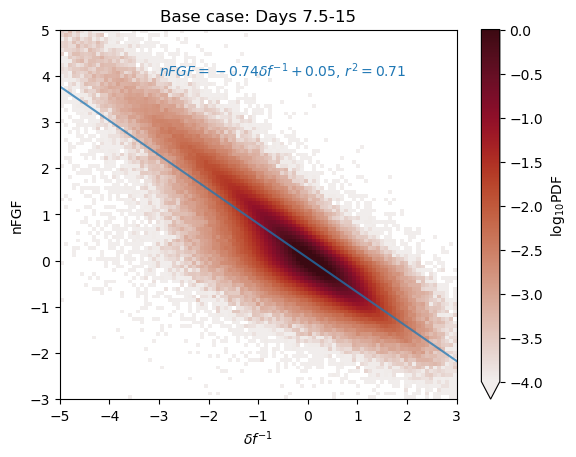

In [142]:
np.log10(dn_hist.T).plot(cmap = cmo.amp, vmin = -4, vmax = 0, 
                         cbar_kwargs = {'label':r'log$_{10}$PDF',
                                        'extend':'min'})

plt.plot(xwhole, y_pred_weighted, alpha = 0.75)
plt.text(-3,4, r'$nFGF = -0.74\delta f^{-1}+0.05, \, r^2 = 0.71$', color = 'tab:blue')
plt.ylabel('nFGF')
plt.xlabel(r'$\delta f^{-1}$')
plt.title('Base case: Days 7.5-15')

In [143]:
dbins = np.linspace(-3,3,100)
nbins = np.linspace(-3,3,100)
dn_hist = histogram(d,n, bins = [dbins, nbins], dim = ['ocean_time','xi_rho','eta_rho'], density = True).load()

dstack = d.stack(z = ['ocean_time', 'eta_rho', 'xi_rho']).values
nstack = n.stack(z = ['ocean_time', 'eta_rho', 'xi_rho']).values

y = nstack
x = dstack
w = np.ones(len(x))
deg = 1 #Linear fit

results_weighted, r2 = polyfit(x, y, deg, w) #weighted
print(results_weighted, r2)

#Sort 
x_sort = np.sort(x)

#Create a vector of values for numerical mixing equal to the length of the stacked salinity gradient
xwhole = np.linspace(x_sort[0], x_sort[-1], 1000)
y_pred_weighted = results_weighted['polynomial'][0]*xwhole+results_weighted['polynomial'][1]

{'polynomial': [-0.7428533558571259, 0.05429314913158445]} 0.7078765677883466


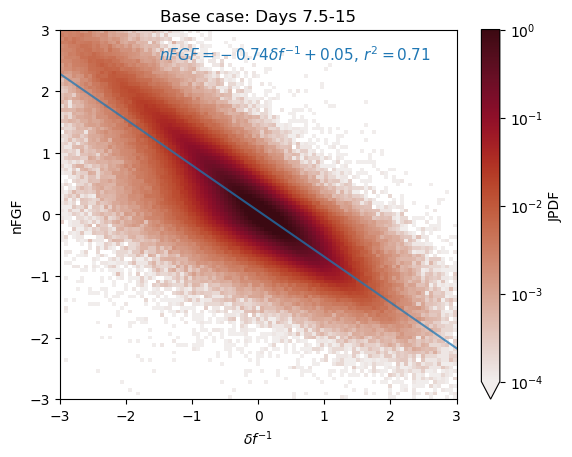

In [165]:
np.log10(dn_hist.T).plot(cmap = cmo.amp, vmin = -4, vmax = 0, 
                         cbar_kwargs = {'label':r'JPDF',
                                        'extend':'min',
                                        'ticks':np.arange(-4,1,1),
                                        'format':tick.FormatStrFormatter('$10^{%d}$')})

plt.plot(xwhole, y_pred_weighted, alpha = 0.75)
plt.text(-1.5,2.5, r'$nFGF = -0.74\delta f^{-1}+0.05, \, r^2 = 0.71$', 
         color = 'tab:blue', fontsize = 11, fontweight = 'bold')
plt.ylabel('nFGF')
plt.xlabel(r'$\delta f^{-1}$')
plt.title('Base case: Days 7.5-15')
plt.savefig('delta_nfgf_JPDF', dpi=300, bbox_inches = 'tight')

### We could continue to refine this by further removing water pile up near the coastal wall but this is unecessary 